<a href="https://colab.research.google.com/github/SalmaSherif7070/Comparative-Analysis-of-Machine-Learning-Models/blob/main/CSAI_253_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
!pip install --quiet kaggle
!pip3 install neptune-client==1.2.0
!pip install opendatasets

In [ ]:
import opendatasets as od
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn import metrics
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Prepere the data set

In [ ]:
with open('kaggle.json', 'w') as f:
        json.dump({"username":"salmasherif202200622","key":"229b193e95c2e1ca70b462cf1507b94c"}, f)

In [ ]:
od.download('https://www.kaggle.com/datasets/gaurav2022/mobile-health/data')

Skipping, found downloaded files in "./mobile-health" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/mobile-health/mhealth_raw_data.csv')

In [ ]:
n_samples = min(df['Activity'].value_counts().tolist())
df = df.groupby('Activity', group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples)))
df.reset_index(drop=True, inplace=True)

# Verify the result
print(df['Activity'].value_counts())

Activity
0     10342
1     10342
2     10342
3     10342
4     10342
5     10342
6     10342
7     10342
8     10342
9     10342
10    10342
11    10342
12    10342
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-2].values, df.iloc[:, -2].values, test_size=0.2, random_state=42)

# Dataset Exploration

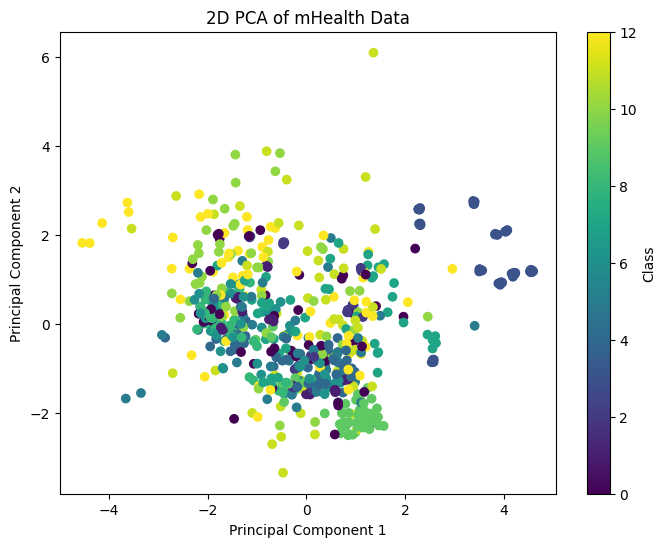

In [ ]:
df_visualization = df.sample(frac=0.005, random_state=42)
x = df_visualization.iloc[:, :-2].values
y = df_visualization.iloc[:, -2].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# Visualizing the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis')
plt.colorbar(label='Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of mHealth Data')
plt.show()

# Model Training and Evaluation

In [ ]:
def Evaluate(y_test, y_pred, model):
  print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
  print("Classification Report \n", metrics.classification_report(y_test, y_pred, digits=3))
  scores = cross_val_score(model, X_train, y_train, cv=5)
  print('Cross-Validation ', scores.mean())
  return scores

KNN

In [ ]:
# train
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluate
Evaluate(y_test, y_pred, knn)

Accuracy: 0.8712904425436966
Confusion Matrix: 
 [[ 995   55   46   33  177  122   84  136  119  158   67   29   57]
 [   0 2033    0    0    0    0    2    0    0    0    0    0    0]
 [   3    0 2087    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0 2102    0    0    0    0    0    0    0    0    0]
 [  61    0    0    0 1910   74   14    5   13    2    5    2    2]
 [ 118    2    2    0  189 1587   22    2   85    4   11    3    3]
 [  16    8    0    0    7    3 1987   39   36    0    1    0    0]
 [  17    2    0    0    3    1   10 2072   12    2    1    0    0]
 [  46    2    0    0   16   25   72   21 1860    4    1    1    0]
 [  51    0    2    0    8   25    4   11   14 1949    0    1    7]
 [  64    0    0    1   23   22    2    3    6    3 1727  162   79]
 [  57    0    0    0   26   17    1    3    3    2  263 1528   86]
 [ 101    0    0    0   16   16    1    4    8    4  167  142 1592]]
Classification Report 
               precision    recall  f1-scor

array([0.86142618, 0.86262842, 0.86007159, 0.86485984, 0.86430199])

SVM

In [ ]:
# Model
clf = SVC(C=40, kernel='rbf', gamma = 0.01)

# Train
clf.fit(X_train, y_train)

# Test
y_pred = clf.predict(X_test)
print(f'The Accuracy of the {clf} classifier is', accuracy_score(y_pred, y_test)*100, " %")

# Evaluate
Evaluate(y_test, y_pred, clf)

The Accuracy of the SVC(C=40, gamma=0.01) classifier is 89.88843436221644  %
Confusion Matrix: 
 [[ 996   98   46   33  145  156  100   87  138  131   43   31   74]
 [   5 2028    0    0    0    0    2    0    0    0    0    0    0]
 [   1    0 2089    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2105    0    0    0    0    0    0    0    0    0]
 [  40    3    0    0 1957   50   14    2   17    2    1    1    1]
 [ 109    4    0    0  127 1669   15    2   93    1    3    0    5]
 [  32   21    0    0    6    4 1951   23   59    0    0    0    1]
 [  19   23    0    0    0    3   34 2023   17    1    0    0    0]
 [  31   19    0    0    7   35   53   18 1881    1    0    0    3]
 [  21    0    0    0    0   12    0    4    6 2028    0    1    0]
 [  21    0    0    0    2    9    0    0    1    0 1872  124   63]
 [  25    0    0    0    1    5    0    0    0    1   98 1788   68]
 [  77    0    0    0    5   13    1    0    1    0   92   78 1784]]
Classification Rep

array([0.89457047, 0.89526289, 0.89391474, 0.8948445 , 0.89498396])

Neural Network

In [ ]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[12]),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=13, activation="softmax"),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer=optimizer)
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 13)                1677      
                                                                 
Total params: 14989 (58.55 KB)
Trainable params: 14989 (58.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
3362/3362 [==============================] - 11s 3ms/step - loss: 0.7889 - accuracy: 0.7373 - val_loss: 0.5788 - val_accuracy: 0.8038
Epoch 

In [ ]:
# Test
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

y_test_one_hot = to_categorical(y_test, num_classes=13)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

accuracy = accuracy_score(y_test_labels, predicted_classes)
print(f'Accuracy: {accuracy}')

# Evaluate
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test_labels, predicted_classes))
print("Classification Report \n", metrics.classification_report(y_test_labels, predicted_classes, digits=3))

841/841 [==============================] - 2s 2ms/step
Accuracy: 0.9414280401636296
Confusion Matrix: 
 [[1451   44   40   26   97  100   41   41   57   78   31   24   48]
 [   1 2034    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2090    0    0    0    0    0    0    0    0    0    0]
 [  14    0    0 2091    0    0    0    0    0    0    0    0    0]
 [  51    0    0    0 2016   12    2    1    4    0    1    0    1]
 [  87    0    0    0   18 1901    1    2   10    0    0    0    9]
 [  64    4    0    0    2   10 2013    3    1    0    0    0    0]
 [  21    1    0    0    0    3   15 2073    6    1    0    0    0]
 [  66    0    0    0    4   11    7    2 1955    0    1    0    2]
 [  22    0    0    0    0    2    0    3    1 2043    1    0    0]
 [  19    0    0    0    1    0    0    0    0    1 1930  113   28]
 [  25    0    0    3    3    0    0    0    0    0   61 1878   16]
 [ 103    0    0    0    8    7    1    0    1    0   47   44 1840]]
Classificat

Logistic Regression

In [ ]:
# Model
clf = LogisticRegression()

# Train
clf.fit(X_train,y_train)

# Test
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Evaluate
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report \n", metrics.classification_report(y_test, y_pred, digits=3))

Accuracy: 0.5427668278170323
Confusion Matrix: 
 [[ 112  224  203   45  176   77  253  182  214  174  121   93  204]
 [   0 1410    0    0  210    0  415    0    0    0    0    0    0]
 [ 134    0 1079    0    0  162    0  207    0  231    0  205   72]
 [   0    0    0 2105    0    0    0    0    0    0    0    0    0]
 [  54  211   13    2 1061  181  170    2  260    0    1   35   98]
 [ 139  154   62    9  394  567  163   32  269   79   32   27  101]
 [  94  329    3    0   88    1 1344    3  235    0    0    0    0]
 [  37  232  270    0   64   11  139 1175   13  134    0   14   31]
 [  59  103    2    0   95  196  437    1 1056   23   22   16   38]
 [   8    0    3    0    5    0    4   71  125 1853    0    0    3]
 [  23    0  102    5   16   27   12   12   16    6 1132  392  349]
 [  33    2  182   21   62   83   35   45   56   13  144 1193  117]
 [  96   26  157   14  121   17  128  113   51   26  470  324  508]]
Classification Report 
               precision    recall  f1-scor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression

In [ ]:
# Model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)

Evaluate(y_test_labels, predicted_classes, model)

MAE: 2.657664115239908
MSE: 10.589811063749549
Confusion Matrix: 
 [[1451   44   40   26   97  100   41   41   57   78   31   24   48]
 [   1 2034    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 2090    0    0    0    0    0    0    0    0    0    0]
 [  14    0    0 2091    0    0    0    0    0    0    0    0    0]
 [  51    0    0    0 2016   12    2    1    4    0    1    0    1]
 [  87    0    0    0   18 1901    1    2   10    0    0    0    9]
 [  64    4    0    0    2   10 2013    3    1    0    0    0    0]
 [  21    1    0    0    0    3   15 2073    6    1    0    0    0]
 [  66    0    0    0    4   11    7    2 1955    0    1    0    2]
 [  22    0    0    0    0    2    0    3    1 2043    1    0    0]
 [  19    0    0    0    1    0    0    0    0    1 1930  113   28]
 [  25    0    0    3    3    0    0    0    0    0   61 1878   16]
 [ 103    0    0    0    8    7    1    0    1    0   47   44 1840]]
Classification Report 
               precision 

array([0.23672677, 0.23858611, 0.24631521, 0.23829972, 0.23738508])